# Linear regression with one variable

In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [198]:
path = 'ex1data1.txt'
data = pd.read_csv(path, names=['Population', 'Profit'])

In [199]:
data = (data - data.mean()) / data.std()
data.insert(0, 'One', 1)
data.head()

,One,Population,Profit
0,1,-0.529654,2.132905
1,1,-0.680150,0.597261
2,1,0.092716,1.419690
3,1,-0.298872,1.091575
4,1,-0.594333,0.178606


In [200]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values.reshape(-1, 1)
theta = np.zeros((1, X.shape[1]))
X.shape, y.shape, theta.shape

((97, 2), (97, 1), (1, 2))

In [201]:
def compute_cost(X, y, theta):
    m = len(X)
    J = np.sum((X @ theta.T - y) ** 2) / (2 * m)
    return J

In [202]:
def gradient(X, y, theta):
    m = len(X)
    dJ = (X @ theta.T - y).T @ X / m
    return dJ

In [203]:
def batch_gradient_descent(X, y, theta, alpha=0.03, iters=1000, show_cost=False):
    costs = []
    
    for i in range(iters):
        theta = theta - alpha * gradient(X, y, theta)
        cost = compute_cost(X, y, theta)
        costs.append(cost)
        
        if show_cost == True and i % 100 == 0:
            print(cost)
            
    return theta, costs

In [204]:
alpha = 0.003
iters = 1500
theta, costs = batch_gradient_descent(X, y, theta, alpha, iters, show_cost=True)
theta

0.49278552939765297
0.3379809751795622
0.25257076421319297
0.20544744685237082
0.17944813115037442
0.16510354645579006
0.1571892185396789
0.1528226518040532
0.15041348892139594
0.14908428312961922
0.14835092132597727
0.14794630411894408
0.1477230649436635
0.14759989734595955
0.1475319421714025


array([[8.01084285e-16, 8.28187694e-01]])

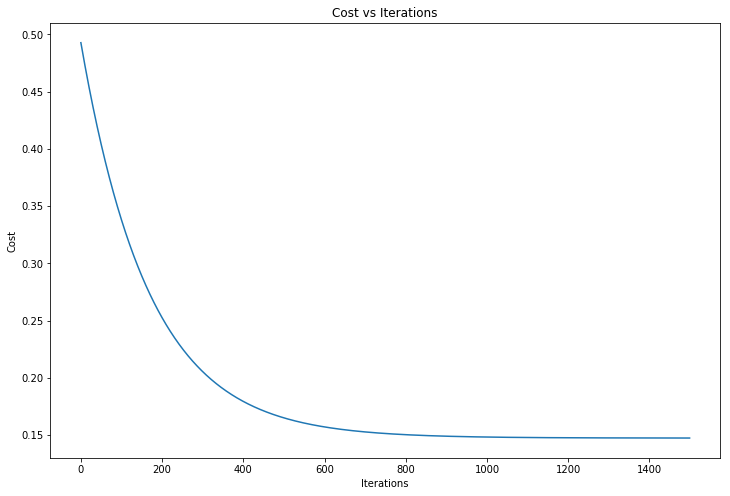

In [205]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(iters), costs)
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Cost vs Iterations')
plt.show()

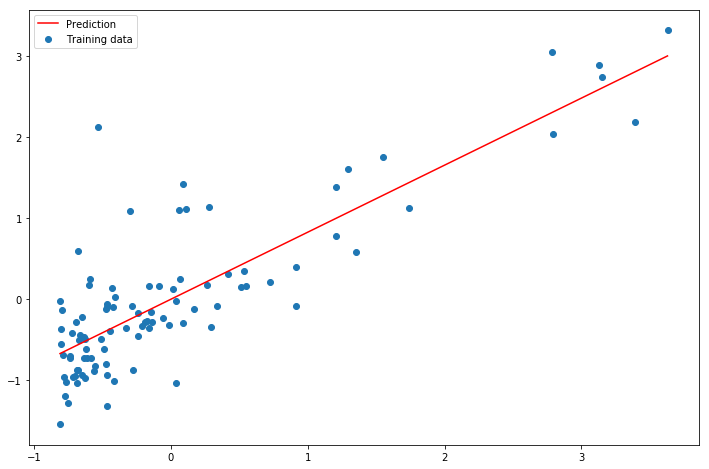

In [206]:
x = np.linspace(data.Population.min(), data.Population.max())
f = theta[0, 0] + theta[0, 1] * x

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(data.Population, data.Profit, label='Training data')
ax.plot(x, f, 'r', label='Prediction')
ax.legend()
plt.show()

In [207]:
def normal_eqn(X, y):
    # X:R(m*n)
    # y:R(m*1)
    
    #Linear algebra
    theta = np.linalg.pinv(X.T @ X) @ X.T @ y
    return theta

In [208]:
theta2 = normal_eqn(X, y)
print(compute_cost(X, y, theta2.T))
theta2

0.1474483032820752


array([[-2.46330734e-16],
       [ 8.37873233e-01]])